<h2><a href="https://leetcode.com/problems/similar-string-groups">839. Similar String Groups</a></h2><h3>Hard</h3><hr><p>Two strings, <code>X</code> and <code>Y</code>, are considered similar if either they are identical or we can make them equivalent by swapping at most two letters (in distinct positions) within the string <code>X</code>.</p>

<p>For example, <code>&quot;tars&quot;</code>&nbsp;and <code>&quot;rats&quot;</code>&nbsp;are similar (swapping at positions <code>0</code> and <code>2</code>), and <code>&quot;rats&quot;</code> and <code>&quot;arts&quot;</code> are similar, but <code>&quot;star&quot;</code> is not similar to <code>&quot;tars&quot;</code>, <code>&quot;rats&quot;</code>, or <code>&quot;arts&quot;</code>.</p>

<p>Together, these form two connected groups by similarity: <code>{&quot;tars&quot;, &quot;rats&quot;, &quot;arts&quot;}</code> and <code>{&quot;star&quot;}</code>.&nbsp; Notice that <code>&quot;tars&quot;</code> and <code>&quot;arts&quot;</code> are in the same group even though they are not similar.&nbsp; Formally, each group is such that a word is in the group if and only if it is similar to at least one other word in the group.</p>

<p>We are given a list <code>strs</code> of strings where every string in <code>strs</code> is an anagram of every other string in <code>strs</code>. How many groups are there?</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> strs = [&quot;tars&quot;,&quot;rats&quot;,&quot;arts&quot;,&quot;star&quot;]
<strong>Output:</strong> 2
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> strs = [&quot;omv&quot;,&quot;ovm&quot;]
<strong>Output:</strong> 1
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= strs.length &lt;= 300</code></li>
	<li><code>1 &lt;= strs[i].length &lt;= 300</code></li>
	<li><code>strs[i]</code> consists of lowercase letters only.</li>
	<li>All words in <code>strs</code> have the same length and are anagrams of each other.</li>
</ul>


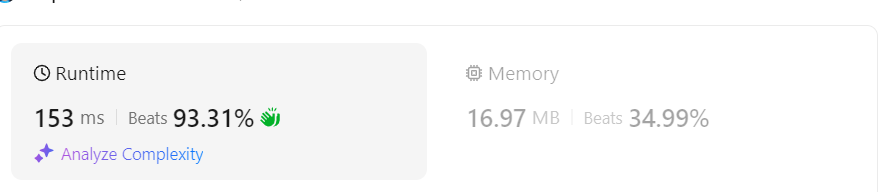

In [25]:
from typing import List

class Solution:
    def numSimilarGroups(self, strs: List[str]) -> int:
        uf = UnionFind(len(strs))

        n = len(strs)
        for i in range(n):
            for j in range(i + 1, n):
                if self.find_distance(strs[i], strs[j]) <= 2:   # we will do union of i and j if its distance is less or equal to 2
                    uf.union(i, j)

        print(f"uf.root before : {uf.root}")
        for i in range(len(strs)):    # Once after doing all the unions , we run a loop to find_root to reupdate the root list,
            root_i = uf.find_root(i)     # this will adjust the roots of the numbers which were found later

        print(f"uf.root : {uf.root}")
        return len(set(uf.root))          # Once all the roots are set , we will give the number of unique roots as answer
         
        

    def find_distance(self, s1, s2):
        count = 0
        for c1, c2 in zip(s1, s2):
            if c1 != c2:
                count += 1
            if count > 2:
                break
        return count


class UnionFind:
    def __init__(self, size):
        self.root = list(range(size))
        self.rank = [1] * size

    def find_root(self, node):
        if self.root[node] != node:
            self.root[node] = self.find_root(self.root[node])
        return self.root[node]

    def union(self, u, v):
        root_u , root_v = self.find_root(u), self.find_root(v)

        if self.rank[root_u] > self.rank[root_v]:
            self.root[root_v] = root_u
        elif self.rank[root_u] < self.rank[root_v] :
            self.root[root_u] = root_v
        else:
            self.root[root_v] = root_u
            self.rank[root_u] += 1

In [12]:
strs = ["omv","ovm"]
sol = Solution()
sol.numSimilarGroups(strs)

1

In [13]:
strs = ["abc","abc"]
sol = Solution()
sol.numSimilarGroups(strs)

1

In [24]:
strs = ["ajdidocuyh","djdyaohuic","ddjyhuicoa","djdhaoyuic","ddjoiuycha","ddhoiuycja","ajdydocuih","ddjiouycha","ajdydohuic","ddjyouicha"]
sol = Solution()
sol.numSimilarGroups(strs)

uf.root before : [0, 0, 4, 1, 4, 4, 0, 4, 1, 2]
uf.root : [0, 0, 4, 0, 4, 4, 0, 4, 0, 4]


2